In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(10886, 12)

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

### Create a dataframe only storing the number of bikes rented

Sums of bikes rented will be easier to calculate if we drop all weather data

In [5]:
df_simple = df.drop(columns=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'])

In [6]:
df_simple_reindexed = df_simple.set_index(pd.to_datetime(df['datetime']))

In [7]:
df_simple_reindexed.head()

,datetime,casual,registered,count
datetime,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,0,1,1


In [8]:
df_simple.head()

,datetime,casual,registered,count
0,2011-01-01 00:00:00,3,13,16
1,2011-01-01 01:00:00,8,32,40
2,2011-01-01 02:00:00,5,27,32
3,2011-01-01 03:00:00,3,10,13
4,2011-01-01 04:00:00,0,1,1


### Analyse yearly data

In [9]:
df_yearly = df_simple_reindexed.resample('1Y').sum()

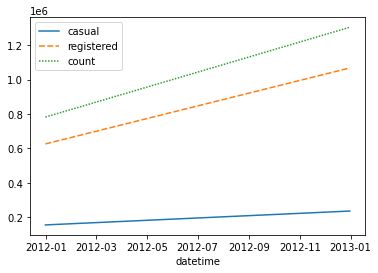

In [10]:
sns.lineplot(data=df_yearly)
plt.show()

### Analysing weekly data

In [11]:
df_weekly = df_simple_reindexed.resample('7D').sum()

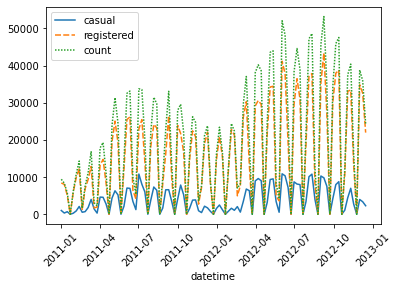

In [12]:
sns.lineplot(data=df_weekly)

plt.xticks(rotation=45)
plt.show()

### Analysing monthly data

In [13]:
df_monthly = df_simple_reindexed.resample('M').sum()

#df_monthly = df_simple
#df_monthly

Text(0, 0.5, 'Mean number of bikes rented per day')

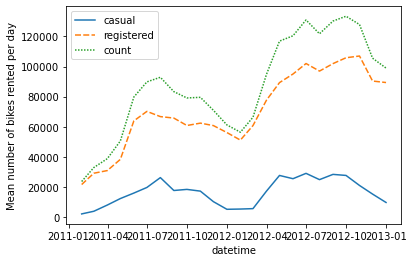

In [14]:
sns.lineplot(data=df_monthly)
plt.ylabel('Mean number of bikes rented per day')


### Analysing hourly data

In [15]:
df_by_time = df_simple

In [16]:
df_simple

,datetime,casual,registered,count
0,2011-01-01 00:00:00,3,13,16
1,2011-01-01 01:00:00,8,32,40
2,2011-01-01 02:00:00,5,27,32
3,2011-01-01 03:00:00,3,10,13
4,2011-01-01 04:00:00,0,1,1
...,...,...,...,...
10881,2012-12-19 19:00:00,7,329,336
10882,2012-12-19 20:00:00,10,231,241
10883,2012-12-19 21:00:00,4,164,168
10884,2012-12-19 22:00:00,12,117,129


In [17]:
df_by_time['time'] = df_by_time['datetime'].dt.time

In [18]:
df_by_time = df_by_time.drop(columns=['datetime'])

In [19]:
df_by_time['time'] = df_by_time['time'].astype('str')

In [20]:
df_by_time.set_index(df_by_time['time'], inplace=True)

In [21]:
df_by_time.head()

,casual,registered,count,time
time,,,,
00:00:00,3,13,16,00:00:00
01:00:00,8,32,40,01:00:00
02:00:00,5,27,32,02:00:00
03:00:00,3,10,13,03:00:00
04:00:00,0,1,1,04:00:00


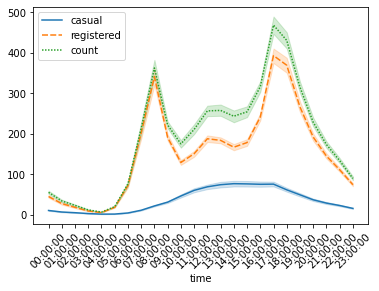

In [22]:
sns.lineplot(data=df_by_time)
plt.xticks(rotation=45);

In [23]:
df_weekdays = df_simple

In [24]:
df_simple

,datetime,casual,registered,count,time
0,2011-01-01 00:00:00,3,13,16,00:00:00
1,2011-01-01 01:00:00,8,32,40,01:00:00
2,2011-01-01 02:00:00,5,27,32,02:00:00
3,2011-01-01 03:00:00,3,10,13,03:00:00
4,2011-01-01 04:00:00,0,1,1,04:00:00
...,...,...,...,...,...
10881,2012-12-19 19:00:00,7,329,336,19:00:00
10882,2012-12-19 20:00:00,10,231,241,20:00:00
10883,2012-12-19 21:00:00,4,164,168,21:00:00
10884,2012-12-19 22:00:00,12,117,129,22:00:00


In [25]:
df_weekdays['day_name'] = df_weekdays['datetime'].dt.day_name()

In [26]:
df_weekdays.set_index(df_weekdays['day_name'], inplace=True)

In [27]:
df_weekdays = df_weekdays.drop(columns=['time', 'datetime', 'day_name'])

In [28]:
df_weekdays.head()

,casual,registered,count
day_name,,,
Saturday,3,13,16
Saturday,8,32,40
Saturday,5,27,32
Saturday,3,10,13
Saturday,0,1,1


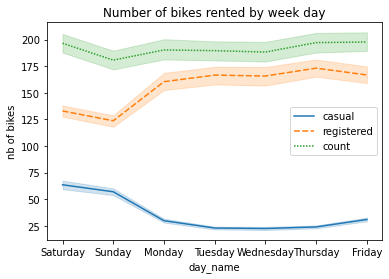

In [29]:
sns.lineplot(data=df_weekdays)
plt.xlabel('day_name')
plt.ylabel('nb of bikes')
plt.title('Number of bikes rented by week day');

### Linear regression

In [30]:
df = pd.read_csv('train.csv')
#df['datetime'] = pd.to_datetime(df['datetime'])
#df.set_index(df['datetime'], inplace=True)

In [31]:
df1 = df

In [32]:
df_test = pd.read_csv('test.csv')
df_test = df_test.set_index('datetime')
datetime_data = df_test.index
df_test.reset_index(inplace=True)
#df_test.head()

In [33]:
X = df.drop(columns=['count','registered','casual'])
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 9), (2722, 9), (8164,), (2722,))

In [34]:
#sns.pairplot(data=df)

In [35]:
def clean_dataframe(dataframe):
    dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])
    dataframe['date'] = dataframe['datetime'].dt.date
    dataframe['time'] = dataframe['datetime'].dt.hour
    dataframe['year'] = dataframe['datetime'].dt.year
    dataframe['month'] = dataframe['datetime'].dt.month
    dataframe.set_index(dataframe['datetime'])
    dataframe = dataframe.drop(columns = ['season','atemp','datetime','date','holiday', 'workingday'], inplace=True)
    
    return dataframe

In [36]:
df.shape

(10886, 12)

In [37]:
clean_dataframe(X_train)
clean_dataframe(X_test)
clean_dataframe(df_test)

In [38]:
clean_dataframe(df1)

In [39]:
df1

,weather,temp,humidity,windspeed,casual,registered,count,time,year,month
0,1,9.84,81,0.0000,3,13,16,0,2011,1
1,1,9.02,80,0.0000,8,32,40,1,2011,1
2,1,9.02,80,0.0000,5,27,32,2,2011,1
3,1,9.84,75,0.0000,3,10,13,3,2011,1
4,1,9.84,75,0.0000,0,1,1,4,2011,1
...,...,...,...,...,...,...,...,...,...,...
10881,1,15.58,50,26.0027,7,329,336,19,2012,12
10882,1,14.76,57,15.0013,10,231,241,20,2012,12
10883,1,13.94,61,15.0013,4,164,168,21,2012,12
10884,1,13.94,61,6.0032,12,117,129,22,2012,12


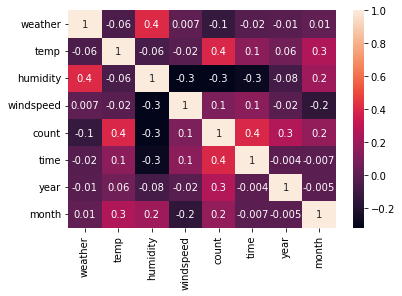

In [40]:
df1_corr = df1.drop(columns=["casual","registered"])
corrMatrix = df1_corr.corr()
sns.heatmap(corrMatrix, annot=True, fmt='.0g')
plt.show()

In [41]:
#sns.pairplot(data=X_train)

In [42]:
df_test.head(5)

,weather,temp,humidity,windspeed,time,year,month
0,1,10.66,56,26.0027,0,2011,1
1,1,10.66,56,0.0000,1,2011,1
2,1,10.66,56,0.0000,2,2011,1
3,1,10.66,56,11.0014,3,2011,1
4,1,10.66,56,11.0014,4,2011,1


In [43]:
df_test['temp'].unique()

array([10.66,  9.84,  9.02, 11.48, 12.3 , 13.12,  8.2 ,  6.56,  5.74,
        4.92,  4.1 ,  3.28,  2.46,  1.64,  0.82,  7.38, 13.94, 14.76,
       17.22, 15.58, 16.4 , 21.32, 22.14, 22.96, 18.86, 18.04, 19.68,
       20.5 , 23.78, 25.42, 27.06, 28.7 , 30.34, 31.16, 27.88, 24.6 ,
       26.24, 29.52, 31.98, 33.62, 32.8 , 35.26, 36.08, 36.9 , 34.44,
       37.72, 38.54, 39.36, 40.18])

In [44]:
df_test.dtypes

weather        int64
temp         float64
humidity       int64
windspeed    float64
time           int64
year           int64
month          int64
dtype: object

In [45]:
pipeline_hour = Pipeline([
    ("binning", KBinsDiscretizer(n_bins=24, encode='onehot-dense', strategy='uniform')),
])

In [46]:
pipeline_encode = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary')),
])

In [47]:
pipeline_weather = Pipeline([
    ("binning", KBinsDiscretizer(n_bins=6, encode='onehot-dense', strategy='kmeans')),
])

In [48]:
transformer = ColumnTransformer(
    [
        ("hour", pipeline_hour, ['time']),
        ("encode", pipeline_encode, ['weather','year', 'month']),
        ("weather", pipeline_weather, ['windspeed', 'humidity', 'temp']),
    ], remainder='passthrough'
)

In [49]:
m = LinearRegression()

In [50]:
X_train_FE = transformer.fit_transform(X_train)

X_test_FE = transformer.transform(X_test)
X_actual_test_FE = transformer.transform(df_test)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 7), (2722, 7), (8164,), (2722,))

In [52]:
m.fit(X_train_FE,y_train)

LinearRegression()

In [53]:
ypred = m.predict(X_test_FE)

In [54]:
ypred

array([436., 285., 313., ..., 286., 183., 128.])

In [55]:
m.score(pd.DataFrame(X_train_FE), y_train)

0.6965727016607137

In [56]:
m.score(pd.DataFrame(X_test_FE), y_test)

0.6896936250593014

### Calculating Root Mean Squared Logarithmic Error

In [57]:
from sklearn.metrics import mean_squared_error
def rmsle(y_true, y_pred):
    ret= mean_squared_error(np.log(y_true+1),np.log(np.clip(y_pred,0,None)+1))
    return np.sqrt(ret)

rmsle(y_test, ypred)

1.134582795576018

In [58]:
ypred_actual_test = m.predict(X_actual_test_FE)

In [59]:
ypred_actual_test
#datetime = df_test.index 

array([ -92., -108., -116., ...,  214.,  183.,  144.])

In [60]:
ypred_actual_test = ypred_actual_test.clip(0)

In [61]:
ypred_actual_test

array([  0.,   0.,   0., ..., 214., 183., 144.])

In [62]:
kaggle_df = pd.DataFrame(data=ypred_actual_test, index=datetime_data, columns=['count'])
kaggle_df
kaggle_df.to_csv('kaggle_submission')